In [1]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))

print(predicted)


[0]


In [2]:
predicted = logr.predict(numpy.array([4.6]).reshape(-1,1))

print(predicted)

[1]


Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.3596
Time:                        23:35:21   Log-Likelihood:                -4.3101
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                   0.02781
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0200      3.046     -1.648      0.099     -10.991       0.951
x1             0.6622      0.

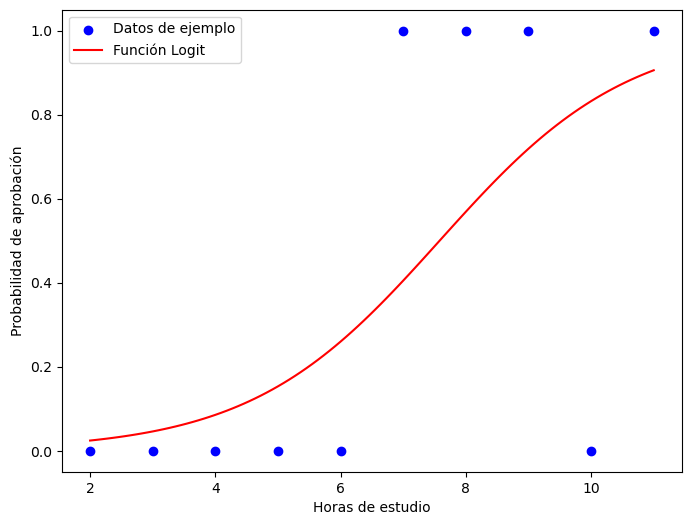

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Datos de ejemplo con algo de ruido
horas_estudio = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
aprobado = [0, 0, 0, 0, 0, 1, 1, 1, 0, 1]  # Modificamos la última observación

# Agregar una constante al conjunto de datos (intercepto)
horas_estudio = sm.add_constant(horas_estudio)

# Crear el modelo de regresión logística
modelo = sm.Logit(aprobado, horas_estudio)

# Ajustar el modelo
resultado = modelo.fit()

# Mostrar los resultados del análisis
print(resultado.summary())

# Crear un conjunto de datos para graficar la función logit
X = np.linspace(2, 11, 100)
Y = resultado.predict(sm.add_constant(X))

# Graficar la función logit y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(horas_estudio[:, 1], aprobado, label='Datos de ejemplo', color='b')
plt.plot(X, Y, label='Función Logit', color='r')
plt.xlabel('Horas de estudio')
plt.ylabel('Probabilidad de aprobación')

plt.legend()
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x, y)

print(model.classes_)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(x))
print(model.predict(x))
print(model.score(x, y))
print(confusion_matrix(y, model.predict(x)))


[0 1]
[-1.04608067]
[[0.51491375]]
[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]
[0 0 0 1 1 1 1 1 1 1]
0.9
[[3 1]
 [0 6]]


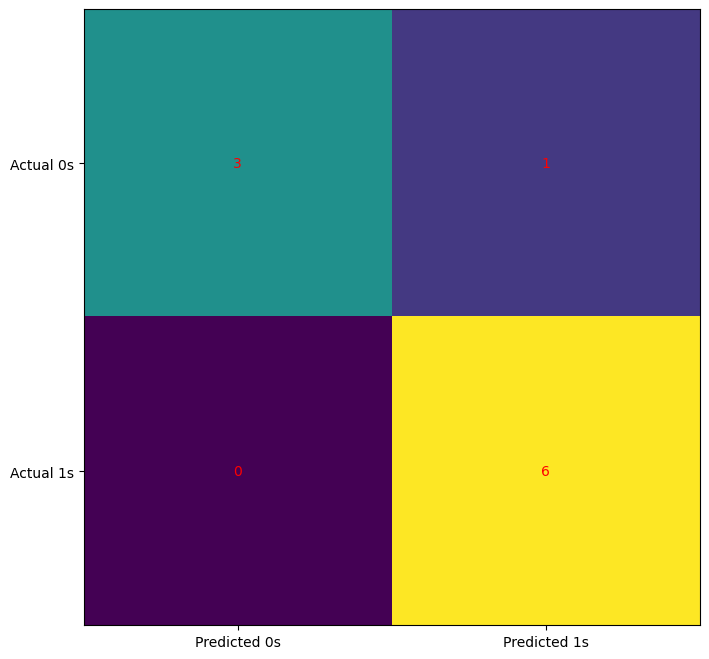

In [3]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [4]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [5]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(x))
print(model.predict(x))
print(model.score(x, y))
print(confusion_matrix(y, model.predict(x)))

[-3.51335372]
[[1.12066084]]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
[0 0 0 0 1 1 1 1 1 1]
1.0
[[4 0]
 [0 6]]


In [6]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

